### 1. mysql데이터 불러오기 및 전처리

In [3]:
#mysql 데이터 추가
import pymysql
#sql 스케마 재접속
conn=pymysql.connect(host='127.0.0.1',user='root',password='1234',db='covid',charset='utf8')
cur=conn.cursor()
sql="""select * from regional_covid_table"""
regional_confirmed_data=[]
cur.execute(sql)
while(True):
    row=cur.fetchone()
    if row==None:
        break
    regional_confirmed_data.append(row)        
conn.close()
print(regional_confirmed_data)

[('제주', 3082), ('서울', 116572), ('인천', 18824), ('광주', 5320), ('경북', 9530), ('부산', 13713), ('대구', 16772), ('강원', 7108), ('경기', 105575), ('전남', 3476), ('충북', 7739), ('충남', 10332), ('대전', 7499), ('세종', 1354), ('전북', 5043), ('경남', 12705), ('울산', 5403)]


### 2. 지역별 코로나 확진자 시각화

In [30]:
import requests
import folium

def find_places(searching):
    url='https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching+'경찰청')
    headers={"Authorization": "KakaoAK 5b9644cce206699aad0688142791a4ce"}
    places=requests.get(url,headers=headers).json()['documents']
    place=places[0]
    name=place['place_name']
    x=place['x']
    y=place['y']
    data=[name,x,y,searching]    
    return data

In [33]:
korea=folium.Map(location=[36.975807653428134, 127.935928678189
                          ],zoom_start=8)
for data in regional_confirmed_data:
    loc=find_places(data[0])
    long=float(loc[1])
    lat=float(loc[2])
    folium.Marker((lat,long),popup=loc[3]+':\n'+str(data[1])+'명').add_to(korea)
    folium.CircleMarker((lat,long),color='red',fill_opacity=0.3,fill=True,radius=data[1]/1000).add_to(korea)
korea

### 3. 주간 국내외 코로나 확진자 시각화

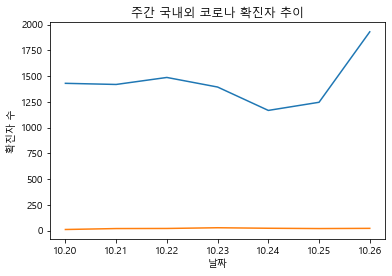

In [39]:
from matplotlib import font_manager,rc
import pandas as pd
import platform
import matplotlib.pyplot as plt
if platform.system()=='Windows':
    path='./data/malgun.ttf'
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)

df=pd.read_excel('./data/week_confirmed.xlsx',engine='openpyxl')
plt.title('주간 국내외 코로나 확진자 추이')
plt.xlabel('날짜')
plt.ylabel('확진자 수')
plt.plot(df['date'],df['국내발생'])
plt.plot(df['date'],df['해외유입'])
plt.show()